<a href="https://colab.research.google.com/github/usaidahmed01/Deep-Learning/blob/master/Rueters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from keras.datasets import reuters
(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words=10000)

train_data[1]
print(len(train_data) , len(test_data))

8982 2246


In [53]:
word_index = reuters.get_word_index()
reverse_word_index = {v : k for k , v in word_index.items()}
decoded_newswire = ' '.join([reverse_word_index.get(i - 3 , '?') for i in train_data[0]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [54]:
import numpy as np

categories = np.unique(train_labels)
print('Total Categoories' , len(categories))

Total Categoories 46


In [55]:
# Multi Hot Encoding
def vectorize_sequences(sequences , dimension = 10000):
    results = np.zeros((len(sequences) , dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i , j] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
# Do the Y values in float or

from keras.utils import to_categorical # do all the work like: flatten the array and then categorical and all

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [57]:
from keras import models , layers

model = models.Sequential([
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(46 , activation = 'softmax')
])

In [58]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [63]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,294,430 (4.94 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 647,216 (2.47 MB)

In [60]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [61]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val , y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3841 - loss: 3.1885 - val_accuracy: 0.6210 - val_loss: 1.7921
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6793 - loss: 1.6012 - val_accuracy: 0.6850 - val_loss: 1.3624
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7468 - loss: 1.1812 - val_accuracy: 0.7390 - val_loss: 1.1917
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7975 - loss: 0.9515 - val_accuracy: 0.7560 - val_loss: 1.0940
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8267 - loss: 0.7995 - val_accuracy: 0.7750 - val_loss: 1.0479
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8475 - loss: 0.6914 - val_accuracy: 0.7840 - val_loss: 0.9589
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8690 - loss: 0.5826 - val_accuracy: 0.8020 - val_loss: 0.9316
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8938 - loss: 0.4857 - val_accuracy: 0.8060 - 

In [62]:
results = model.evaluate(x_test , y_test)
print('Test Loss ' , results[0])
print('Test Accuracy ' , results[1])

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8055 - loss: 0.9935
Test Loss  1.0379313230514526
Test Accuracy  0.7947462201118469


In [ ]:
# Practice

In [1]:
from keras.datasets import reuters
from keras.utils import to_categorical
from keras import models , layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words= 10000)

train_data[1]
print(len(train_data) , len(test_data))

8982 2246


In [10]:
word_index = reuters.get_word_index()
reverse_word_index = { v : k for k , v in word_index.items()}

decoded_sen = ' '.join([reverse_word_index.get(i - 3 , '?') for i in train_data[1] ])
decoded_sen

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [11]:
def vectorize_sequences(sequences , dimension = 10000):
  result = np.zeros((len(sequences) , dimension))
  for i , sequence in enumerate(sequences):
    for j in sequence:
      result[i , j] = 1
  return result

In [29]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = train_labels
y_test = test_labels

In [30]:
model = models.Sequential([
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(64 , activation= 'relu'),
    layers.Dense(46 , activation = 'softmax')
])

In [31]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [33]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val , y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.3858 - loss: 3.2380 - val_accuracy: 0.5890 - val_loss: 1.8808
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6288 - loss: 1.7094 - val_accuracy: 0.6830 - val_loss: 1.4012
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7242 - loss: 1.2414 - val_accuracy: 0.7160 - val_loss: 1.2156
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7703 - loss: 1.0158 - val_accuracy: 0.7520 - val_loss: 1.0914
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8174 - loss: 0.8401 - val_accuracy: 0.7850 - val_loss: 0.9936
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8526 - loss: 0.6895 - val_accuracy: 0.7990 - val_loss: 0.9451
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8808 - loss: 0.5746 - val_accuracy: 0.7970 - val_loss: 0.9163
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8942 - loss: 0.4969 - val_accuracy: 0.7980 - v

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,294,430 (4.94 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 647,216 (2.47 MB)

In [20]:
result = model.evaluate(x_test , y_test)
print('Test Loss ' , result[0])
print('Test Accuracy ' , result[1])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7861 - loss: 1.0522
Test Loss  1.0572333335876465
Test Accuracy  0.7836152911186218


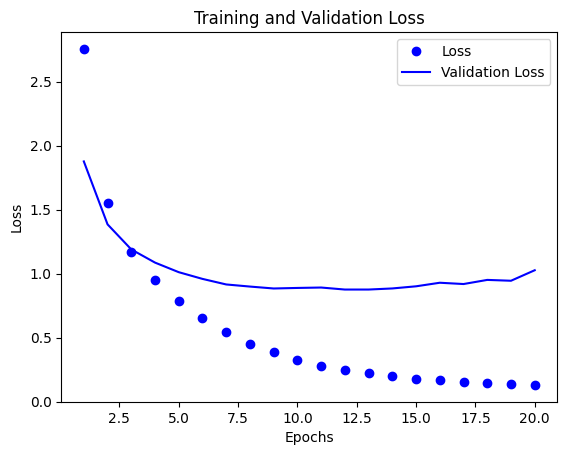

In [22]:
history_dict = history.history

epochs = range(1 , len(history_dict['loss']) + 1)
plt.plot(epochs , history_dict['loss'] , 'bo' , label = 'Loss')
plt.plot(epochs , history_dict['val_loss'] , 'b' , label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# sparse_categorical_crossentropy expects integer labels (e.g., a single number from 0 to 45 for each sample), while categorical_crossentropy expects one-hot encoded labels (e.g., an array of 46 zeros with a single one). Since you've used to_categorical earlier to convert your labels to one-hot encoded format, you should use categorical_crossentropy as your loss function. The error message target.shape=(None, 46), output.shape=(None, 46) confirms that both your target and output have the same rank (ndim), whereas sparse_categorical_crossentropy expects the target to have one less dimension.